In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from IPython.display import Image
import tensorflow.keras.backend as K

import pandas as pd
import numpy as np
import seaborn as sns

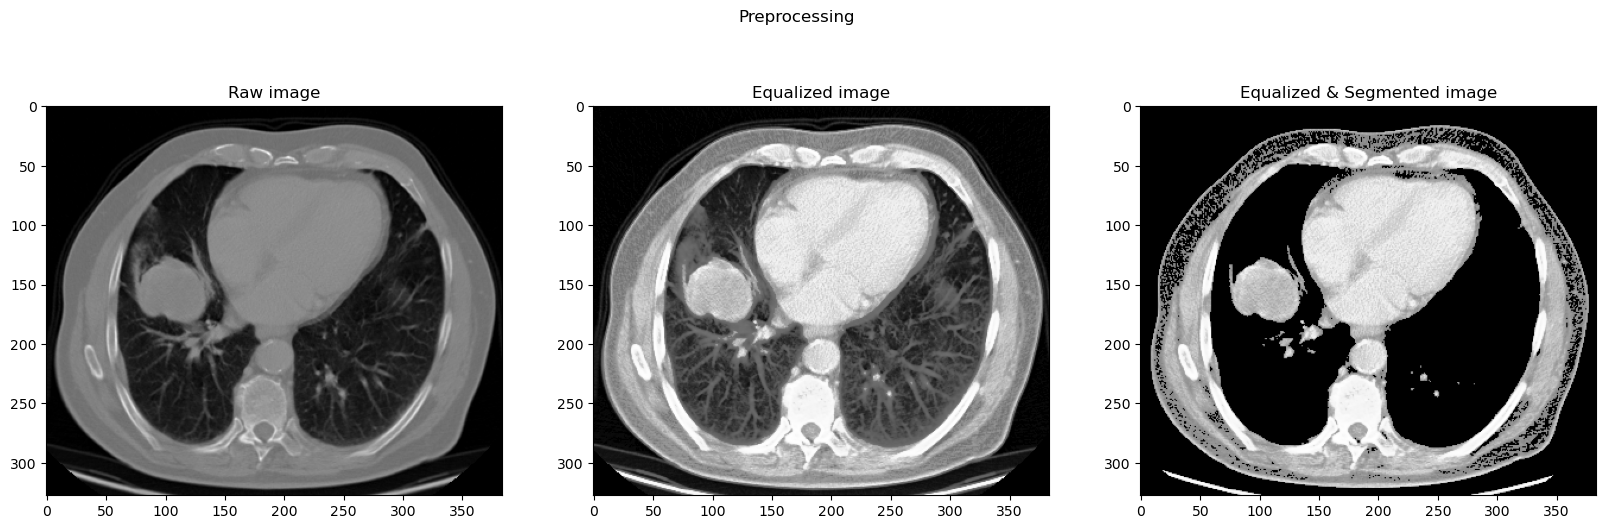

In [15]:
img = cv2.imread(r"rawData\adenocarcinoma\adenocarcinoma8.png", 0)
equalizedImage = cv2.equalizeHist(img)
e, segmentedImage = cv2.threshold(equalizedImage, 128, 255, cv2.THRESH_TOZERO)

plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Raw image')

ax2 = plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(equalizedImage, cv2.COLOR_BGR2RGB))
ax2.set_title('Equalized image')

ax3 = plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(segmentedImage, cv2.COLOR_BGR2RGB))
ax3.set_title('Equalized & Segmented image')

plt.suptitle('Preprocessing')

plt.show()

In [3]:
print(os.getcwd(), os.listdir())

C:\Users\Sai Punith Reddy\Downloads\lungcancer ['.ipynb_checkpoints', 'CNN.png', 'data', 'eval.txt', 'InceptionV3.png', 'Lung Cancer.ipynb', 'methodology.jpeg', 'MOBILENET.png', 'notebook.ipynb', 'processedData', 'rawData', 'README.md', 'ResNet50.png', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'VGG16.png', 'VGG19.png', 'Xception.png']


In [4]:
BATCH_SIZE=32


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2,                  
                                                                rotation_range=5,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                fill_mode='nearest'
                                                                )

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [5]:
train_dataset  = train_datagen.flow_from_directory(directory = r'processedData/train',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size=32)

Found 699 images belonging to 2 classes.


In [6]:
valid_dataset = valid_datagen.flow_from_directory(directory = r'processedData/val',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 99 images belonging to 2 classes.


In [7]:
test_dataset = test_datagen.flow_from_directory(directory = 'processedData/test',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 202 images belonging to 2 classes.


In [8]:
CNN = tf.keras.Sequential()
CNN.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
CNN.add(tf.keras.layers.Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Flatten())
CNN.add(tf.keras.layers.Dense(units=64, activation='relu'))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

CNN.summary()

CNN = tf.keras.Sequential()
CNN.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
CNN.add(tf.keras.layers.Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Flatten())
CNN.add(tf.keras.layers.Dense(units=64, activation='relu'))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

CNN.summary()

CNN.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [9]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('CNN.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

CNN_history = CNN.fit(train_dataset,validation_data=valid_dataset, epochs=36,verbose = 1, callbacks=[lrd,mcp,es], shuffle=True)

Epoch 1/36
22/22 [==============================] - 39s 2s/step - loss: 0.6150 - val_loss: 0.4846 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - 31s 1s/step - loss: 0.4950 - val_loss: 0.4084 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - 30s 1s/step - loss: 0.4455 - val_loss: 0.4635 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - 31s 1s/step - loss: 0.4337 - val_loss: 0.3211 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - 32s 1s/step - loss: 0.3826 - val_loss: 0.3764 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - 33s 1s/step - loss: 0.3972 - val_loss: 0.4415 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - 35s 2s/step - loss: 0.3843 - val_loss: 0.2710 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - 34s 2s/step - loss: 0.3516 - val_loss: 0.3495 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - 36s 2s/step - loss: 0.3547 - val_loss: 0.3849 - lr: 0.0010
E

In [176]:
from tensorflow.keras.preprocessing import image
image_path=r"C:\Users\Sai Punith Reddy\Downloads\lungcancer\processedData\test\cancerous\large.cell.carcinoma91.png"
img = image.load_img(image_path,target_size=(224,224))  # Replace your_target_size with the desired image size for your model
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0  # Normalize the image if required

# Make predictions using the CNN model
predictions = CNN.predict(img)
if predictions[0][0]<0.5:
    print("cancer",predictions[0][0])
else:
    print("notcancer")
       


1/1 [==============================] - 0s 34ms/step
cancer 0.26402193


In [177]:
from tensorflow.keras.preprocessing import image
from tkinter import Tk, Label
from PIL import ImageTk, Image
def open_folder_dialog():
    
    file_path = filedialog.askopenfilename(initialdir="~/Desktop", title="Select Image File", filetypes=(("Image files", "*.png;*.jpg;*.jpeg"), ("All files", "*.*")))
    img = cv2.imread(file_path, 0)
    equalizedImage = cv2.equalizeHist(img)
    e, segmentedImage = cv2.threshold(equalizedImage, 128, 255, cv2.THRESH_TOZERO)
    plt.figure(figsize=(20, 6))
    ax1 = plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    img_pil = img_pil.resize((150, 150))
    img_tk = ImageTk.PhotoImage(img_pil)
    image_label.config(image=img_tk)
    image_label.image = img_tk
    
    ax1.set_title('Raw image')
    ax2 = plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(equalizedImage, cv2.COLOR_BGR2RGB))
    img_pil = Image.fromarray(cv2.cvtColor(equalizedImage, cv2.COLOR_BGR2RGB))
    img_pil = img_pil.resize((150, 150))
    img_tk = ImageTk.PhotoImage(img_pil)
    image_label1.config(image=img_tk)
    image_label1.image = img_tk
   
    ax2.set_title('Equalized image')
    ax3 = plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(segmentedImage, cv2.COLOR_BGR2RGB))
    img_pil = Image.fromarray(cv2.cvtColor(segmentedImage, cv2.COLOR_BGR2RGB))
    img_pil = img_pil.resize((150, 150))
    img_tk = ImageTk.PhotoImage(img_pil)
    image_label2.config(image=img_tk)
    image_label2.image = img_tk
    
    ax3.set_title('Equalized & Segmented image')
    plt.suptitle('Preprocessing')
    plt.show()
    img = image.load_img(file_path,target_size=(224,224))  # Replace your_target_size with the desired image size for your model
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255.0
    predictions = CNN.predict(img)
    if predictions[0][0]<0.5:
        result_label.config(text="Cancerous")
    else:
        result_label.config(text="Non-Cancerous")

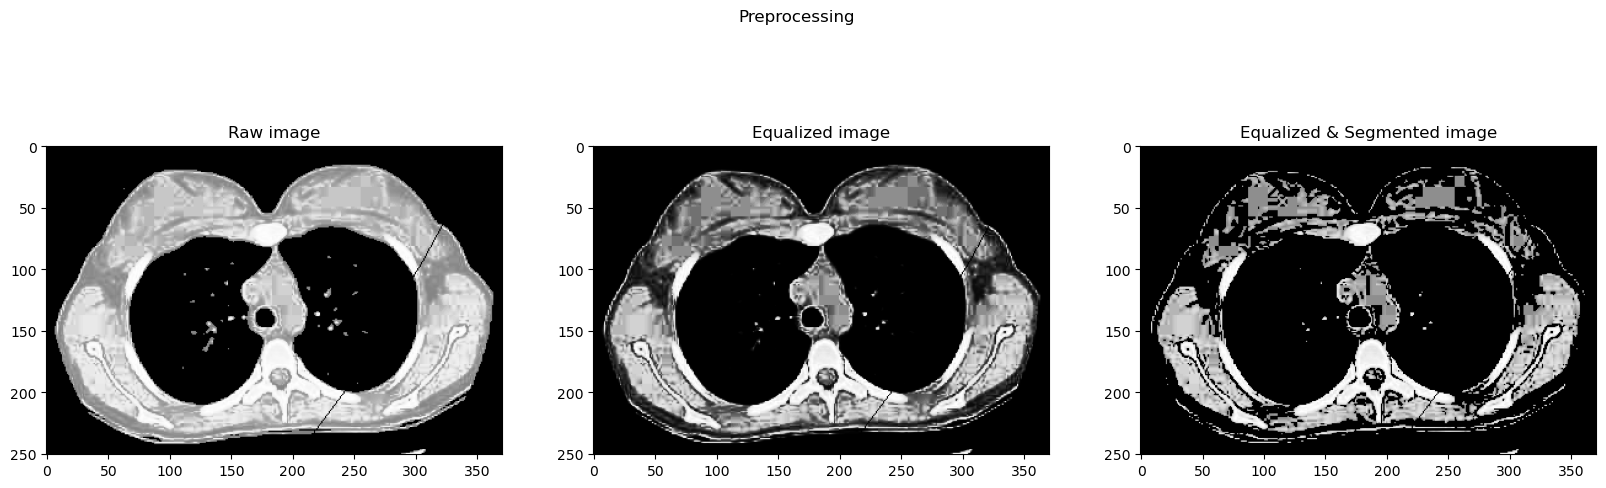

1/1 [==============================] - 0s 27ms/step


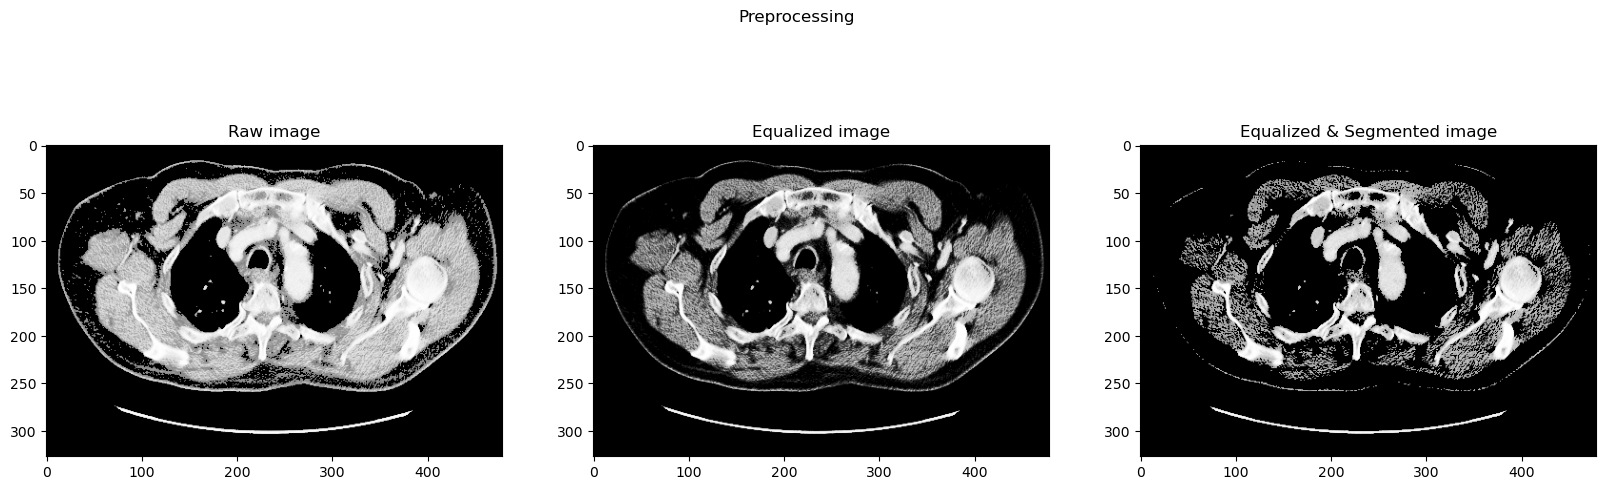

1/1 [==============================] - 0s 27ms/step


In [ ]:
import tkinter as tk
from tkinter import Tk, Label

from tkinter import filedialog
from PIL import ImageTk, Image
# Create the main window
window = tk.Tk()

# Set the window title
window.title("Lung cancer detection system")
window.state("zoomed")  
heading_label = tk.Label(window, text="Lung Cancer Detection System", font=("Arial", 24, "bold"))
heading_label.pack(pady=10)
result_label = tk.Label(window, text="")
result_label.pack(side=tk.TOP,pady=20)
result_label1 = tk.Label(window, text="")
result_label1.pack(side=tk.TOP)
result_label1.config(text="These are rawimage,equalizedimage and segmented image")
button1=tk.Button(window, text="selectimage", command=open_folder_dialog)
button1.pack(side=tk.LEFT)
image_label = tk.Label(window)
image_label.pack(pady=10)
image_label1 = tk.Label(window)
image_label1.pack(pady=10)
image_label2 = tk.Label(window)
image_label2.pack(pady=10)

# Start the main event loop
window.mainloop()